# **Instalando Bibliotecas Necessárias**

In [1]:
!pip install  visualkeras
!pip3 install ann_visualizer
!pip install graphviz

     |████████████████████████████████| 992 kB 11.6 MB/s 
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=796d771e5b34e3e6311c7298ab3b8fbf539f8748a5fbb875105dabfe2baf5e3b
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


# **Importando meu Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importando Bibliotecas**

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications.densenet import DenseNet201
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
import visualkeras
import os
from tqdm import tqdm
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
import tensorflow.keras.backend as K

# **Puxando Diretorios de Treino e Teste**

In [4]:
train_path = "/content/drive/MyDrive/Colab Notebooks/DATASET/train/"
test_path = "/content/drive/MyDrive/Colab Notebooks/DATASET/test/"

# **Verificando Número de Classes no Diretorio de Treino**

In [5]:
numberOfClass = len(glob(train_path+"/*")) 
print("Número de Classes: ",numberOfClass)

Número de Classes:  4


# **Amostras de Imagens das Classes**

In [6]:
def sampleImage(sampe_image_path):
  img = load_img(train_path + sampe_image_path)
  x = img_to_array(img)
  print(x.shape)
  plt.imshow(img)
  plt.axis("off")
  plt.show()

COVID19

(271, 361, 3)


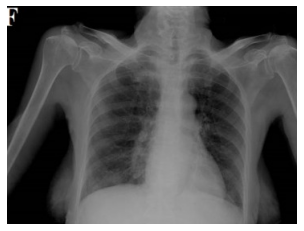

In [7]:
sample_image_path = "COVID19/COVID19(16).jpg"
sampleImage(sample_image_path)

NORMAL

(1662, 1774, 3)


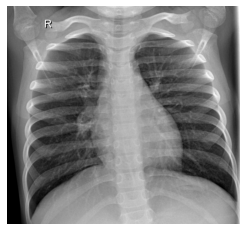

In [8]:
sample_image_path = "NORMAL/NORMAL2-IM-0931-0001.jpeg"
sampleImage(sample_image_path)

PNEUMONIA

(784, 1280, 3)


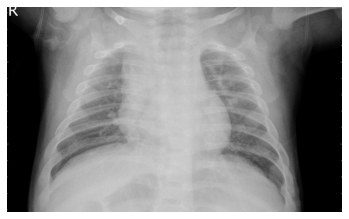

In [9]:
sample_image_path = "PNEUMONIA/person1018_virus_1706.jpeg"
sampleImage(sample_image_path)

TUBERCULOSE

(512, 512, 3)


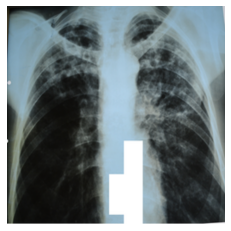

In [10]:
sample_image_path = "TURBERCULOSIS/Tuberculosis-441.png"
sampleImage(sample_image_path)

In [11]:
labels = ['COVID19','NORMAL','PNEUMONIA','TURBERCULOSIS']

# **Altera Tamanho de Imagem para um Tamanho Padrão**

In [12]:
X_train = []
y_train = []
image_size = 224
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Colab Notebooks/DATASET','train',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Colab Notebooks/DATASET','test',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 41/41 [00:33<00:00,  1.23it/s]


# **Plota uma Grade com Exemplos das Imagens Utilizadas em Cada Classe**

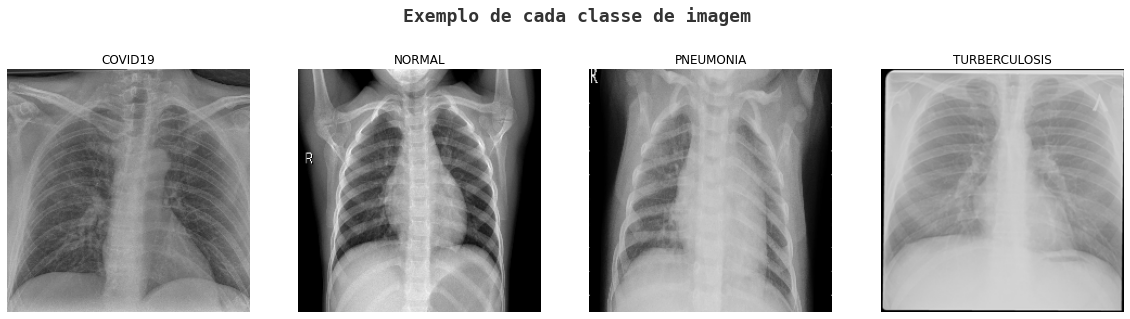

In [13]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Exemplo de cada classe de imagem',size=18,fontweight='bold',
             fontname='monospace',y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

# Divisão dos Dados de Treino e Teste

In [14]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [15]:
X_train.shape

(7097, 224, 224, 3)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [17]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

# **Criação do Modelo DenseNet 201**

In [18]:
DenseNet = DenseNet201(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

74850304/74836368 [==============================] - 1s 0us/step


In [19]:
DenseNet.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [20]:
visualkeras.layered_view(DenseNet)

# **Inserção de Camadas no Modelo**

In [21]:
model = DenseNet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(numberOfClass,activation='softmax')(model)
model = tf.keras.models.Model(inputs=DenseNet.input, outputs = model)

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [23]:
visualkeras.layered_view(model)

# **Definição da Função para Calculo do F1-Score**

In [24]:
def f1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# **Definição das Metricas que Serão Utilizadas Para Avaliação do Modelo**

In [25]:
METRICS = [
            tf.keras.metrics.BinaryAccuracy(name='acuracia'),
            tf.keras.metrics.Precision(name='precisão'),
            tf.keras.metrics.Recall(name='recall'),  
            tf.keras.metrics.AUC(name='auc'),
            #tfa.metrics.F1Score(num_classes=4)
            f1_score
           ]

# **Compilando Modelo**

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'Adam', 
              metrics=METRICS)

# **Funções de Callback**

In [27]:
tensorboard = TensorBoard(log_dir = 'logs')
#checkpoint = ModelCheckpoint("CovidModelEfficientNet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
'''reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', 
                              factor = 0.3, 
                              patience = 2, 
                              min_delta = 0.001,
                              mode='auto',verbose=1)
'''

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.01 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.001, 5)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

# **Fit dos dados com o Modelo**

In [28]:
history = model.fit(X_train,
                 y_train,
                 validation_split=0.1, 
                 epochs =100, 
                 verbose=1, 
                 batch_size=32,
                  callbacks=[tensorboard,lr_scheduler]
                 )

Epoch 1/100
180/180 [==============================] - 148s 622ms/step - loss: 0.2848 - acuracia: 0.9489 - precisão: 0.9039 - recall: 0.8904 - auc: 0.9849 - f1_score: 0.8957 - val_loss: 0.3235 - val_acuracia: 0.9577 - val_precisão: 0.9168 - val_recall: 0.9139 - val_auc: 0.9815 - val_f1_score: 0.9155 - lr: 0.0010
Epoch 2/100
180/180 [==============================] - 102s 566ms/step - loss: 0.1116 - acuracia: 0.9804 - precisão: 0.9621 - recall: 0.9595 - auc: 0.9970 - f1_score: 0.9608 - val_loss: 0.6554 - val_acuracia: 0.9006 - val_precisão: 0.8041 - val_recall: 0.7966 - val_auc: 0.9639 - val_f1_score: 0.8003 - lr: 3.9811e-04
Epoch 3/100
180/180 [==============================] - 105s 581ms/step - loss: 0.0576 - acuracia: 0.9902 - precisão: 0.9808 - recall: 0.9800 - auc: 0.9988 - f1_score: 0.9803 - val_loss: 0.0763 - val_acuracia: 0.9879 - val_precisão: 0.9765 - val_recall: 0.9750 - val_auc: 0.9969 - val_f1_score: 0.9758 - lr: 1.5849e-04
Epoch 4/100
180/180 [=============================

# **Avaliando o Modelo**

In [29]:
results = model.evaluate(X_train,y_train)

200/200 [==============================] - 31s 157ms/step - loss: 0.0127 - acuracia: 0.9985 - precisão: 0.9970 - recall: 0.9970 - auc: 0.9998 - f1_score: 0.9970


In [ ]:
#results2 = model.evaluate(X_test,y_test)

In [31]:
print(history.history.keys())

dict_keys(['loss', 'acuracia', 'precisão', 'recall', 'auc', 'f1_score', 'val_loss', 'val_acuracia', 'val_precisão', 'val_recall', 'val_auc', 'val_f1_score', 'lr'])


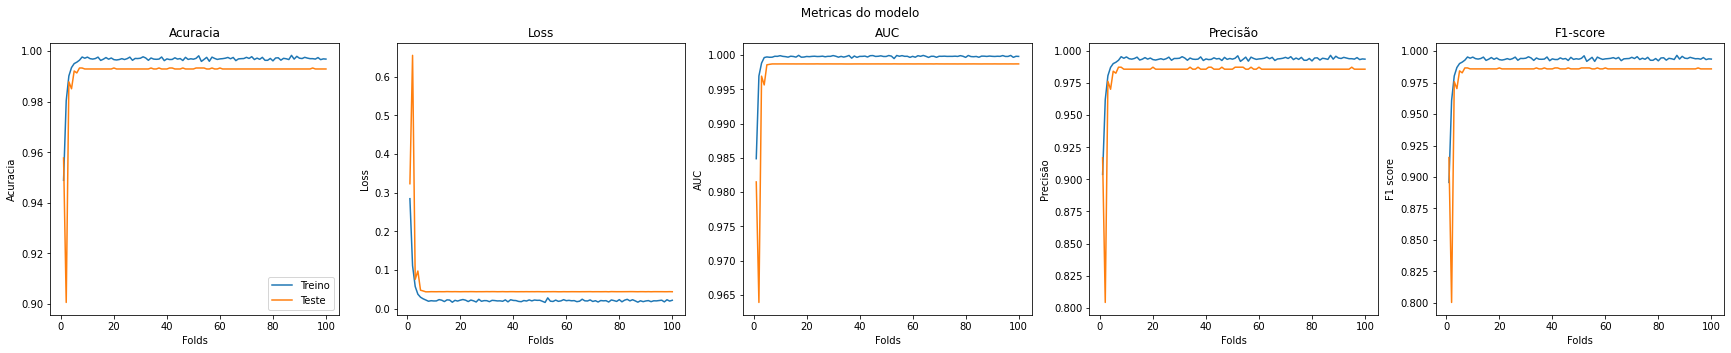

In [32]:
def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (30,5))
    fig.suptitle(" Metricas do modelo ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('Acuracia')
    ax1.set_xlabel('Folds')
    ax1.set_ylabel('Acuracia')
    ax1.legend(['Treino', 'Teste'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('Loss')
    ax2.set_xlabel('Folds')
    ax2.set_ylabel('Loss')
    ax1.legend(['Treino', 'Teste'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('AUC')
    ax3.set_xlabel('Folds')
    ax3.set_ylabel('AUC')
    ax1.legend(['Treino', 'Teste'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('Precisão')
    ax4.set_xlabel('Folds')
    ax4.set_ylabel('Precisão')
    ax1.legend(['Treino', 'Teste'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('F1-score')
    ax5.set_xlabel('Folds')
    ax5.set_ylabel('F1 score')
    ax1.legend(['Treino', 'Teste'])


    plt.show()
    

Train_Val_Plot(history.history['acuracia'],history.history['val_acuracia'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precisão'],history.history['val_precisão'],
               history.history['f1_score'],history.history['val_f1_score']
              )

In [33]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [34]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        61
           1       0.97      0.97      0.97       174
           2       0.99      0.99      0.99       411
           3       1.00      1.00      1.00        64

    accuracy                           0.98       710
   macro avg       0.98      0.99      0.98       710
weighted avg       0.98      0.98      0.98       710



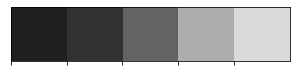

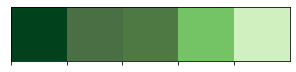

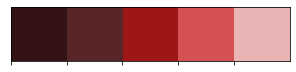

In [35]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

[[ 61   0   0   0]
 [  1 168   5   0]
 [  1   5 405   0]
 [  0   0   0  64]]


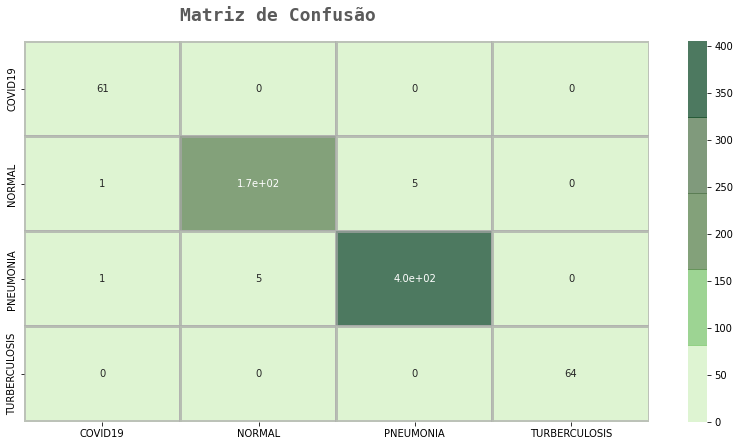

[[ 61   0   0   0]
 [  1 168   5   0]
 [  1   5 405   0]
 [  0   0   0  64]]


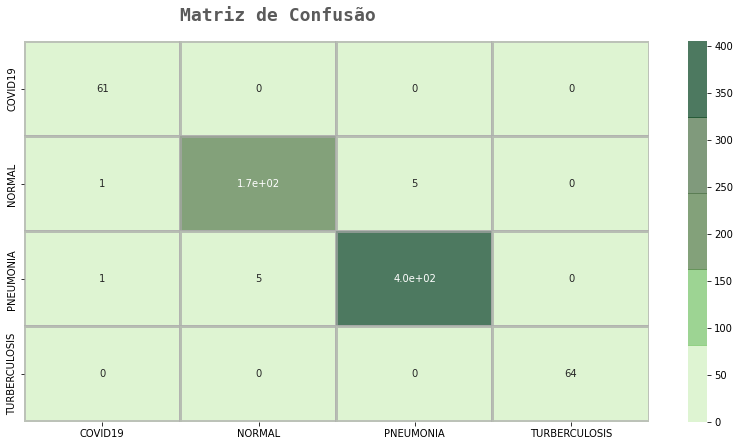

In [36]:
fig,ax=plt.subplots(1,1,figsize=(14,7))

sns.heatmap(confusion_matrix(y_test_new,pred),
            ax=ax,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            cmap=colors_green[::-1],
            alpha=0.7,
            linewidths=2,
            linecolor=colors_dark[3]
            )

fig.text(s='Matriz de Confusão',
         size=18,
         fontweight='bold',
         fontname='monospace',
         color=colors_dark[1],
         y=0.92,
         x=0.28,
         alpha=0.8)
print(confusion_matrix(y_test_new,pred))
plt.show()